# Задание 1. Реализуйте 1 шаг градиентного спуска для сети с несколькими входами

## Подключение библиотек

In [38]:
import numpy as np
import matplotlib.pyplot as plt

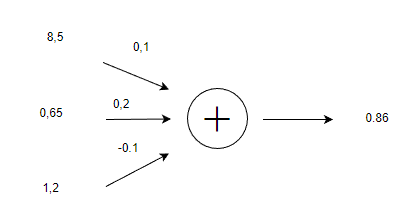

## Описание векторных функций

In [39]:
# скалярное произведение вектров
def w_sum(a,b):
    output = a.dot(b)
    return output

def ele_mul(number,vector): #реализовать умножение числа на вектор
  return number * vector

def neural_network(input,weights):
    pred = w_sum(input,weights)
    return pred

## Реализация шага

In [40]:
games =  [8.5, 9.5, 9.9, 9.0] # среднее число игр, сыгранных каждым игроком в сезоне
wins= [0.65, 0.8, 0.8, 0.9] # доля побед
nfans = [1.2, 1.3, 0.5, 1.0] # число фанатов в тысячах
win_or_lose_binary = [1, 1, 0, 1] # целевые значения выхода сети

target = win_or_lose_binary[0] 
input = [games[0],wins[0],nfans[0]]

weights = [0.1, 0.2, -.1] 
weight_corrections = []
learning_rate  = 0.01
# шаг алгоритма градиентного спуска
# -------------------------------------------------------- #
pred = neural_network(np.array(input),np.array(weights))
error = (pred - target) ** 2 
derivative = 2 * ele_mul(pred - target, np.array(input))
weight_corrections = weights - ele_mul(learning_rate, np.array(derivative))
# -------------------------------------------------------- #  
print("Предсказание: "+ str(pred))
print("Ошибка: "+ str(error))
print("Веса: " + str(weights))
print("Новые веса: " + str(weight_corrections))

print("Новое предсказание: ", neural_network(np.array(input),weight_corrections))
print("Ошибка для нового предсказания: ", (neural_network(np.array(input),weight_corrections) - target) ** 2 )

Предсказание: 0.8600000000000001
Ошибка: 0.01959999999999997
Веса: [0.1, 0.2, -0.1]
Новые веса: [ 0.1238   0.20182 -0.09664]
Новое предсказание:  1.067515
Ошибка для нового предсказания:  0.004558275224999999


# Задание 2. Реализация несколько итераций

## Реализация алгоритма

In [41]:
games =  [8.5, 9.5, 9.9, 9.0] # среднее число игр, сыгранных каждым игроком в сезоне
wins= [0.65, 0.8, 0.8, 0.9] # доля побед
nfans = [1.2, 1.3, 0.5, 1.0] # число фанатов в тысячах
win_or_lose_binary = [1, 1, 0, 1] # целевые значения выхода сети

target = win_or_lose_binary[0] 
input = [games[0],wins[0],nfans[0]]

weights = [0.1, 0.2, -.1]
new_weights = []
learning_rate  = 0.001
 
# for plots
array_errors = []
array_weights_first_case = []
array_weights_second_case = []
array_weights_third_case = []
array_derivative_first_case = []
array_derivative_second_case = []
array_derivative_third_case = []

for iteration in range(20):
  pred = neural_network(np.array(input),np.array(weights))
  error = (pred - target) ** 2 
  derivative = 2 * ele_mul(pred - target, np.array(input))
  weights = weights - ele_mul(learning_rate, np.array(derivative))

  array_errors.append(error)

  array_weights_first_case.append(weights[0])
  array_weights_second_case.append(weights[1])
  array_weights_third_case.append(weights[2])

  array_derivative_first_case.append(derivative[0])
  array_derivative_second_case.append(derivative[1])
  array_derivative_third_case.append(derivative[2])
  print("Error:" + str(error) + " Prediction:" + str(pred))

print("Final weights: ", weights)

Error:0.01959999999999997 Prediction:0.8600000000000001
Error:0.014220204752250021 Prediction:0.8807514999999999
Error:0.010317052203873092 Prediction:0.8984271089125002
Error:0.0074852344274861475 Prediction:0.9134827506939446
Error:0.005430692151910368 Prediction:0.9263067699723349
Error:0.003940079303398113 Prediction:0.9372299489931853
Error:0.002858608899715495 Prediction:0.9465340398036705
Error:0.0020739797888040075 Prediction:0.9544590317537713
Error:0.0015047151657561627 Prediction:0.9612093417720688
Error:0.0010917019260647334 Prediction:0.9669590870879037
Error:0.0007920522916870404 Prediction:0.9718565764042993
Error:0.000574650293993817 Prediction:0.9760281353667718
Error:0.00041692065518023595 Prediction:0.9795813650020322
Error:0.0003024845450053671 Prediction:0.9826079171746059
Error:0.00021945878389630473 Prediction:0.9851858586513998
Error:0.0001592218796778132 Prediction:0.9873816847527963
Error:0.0001155187617375849 Prediction:0.989252034530313
Error:8.3811247175250

## Построение графика

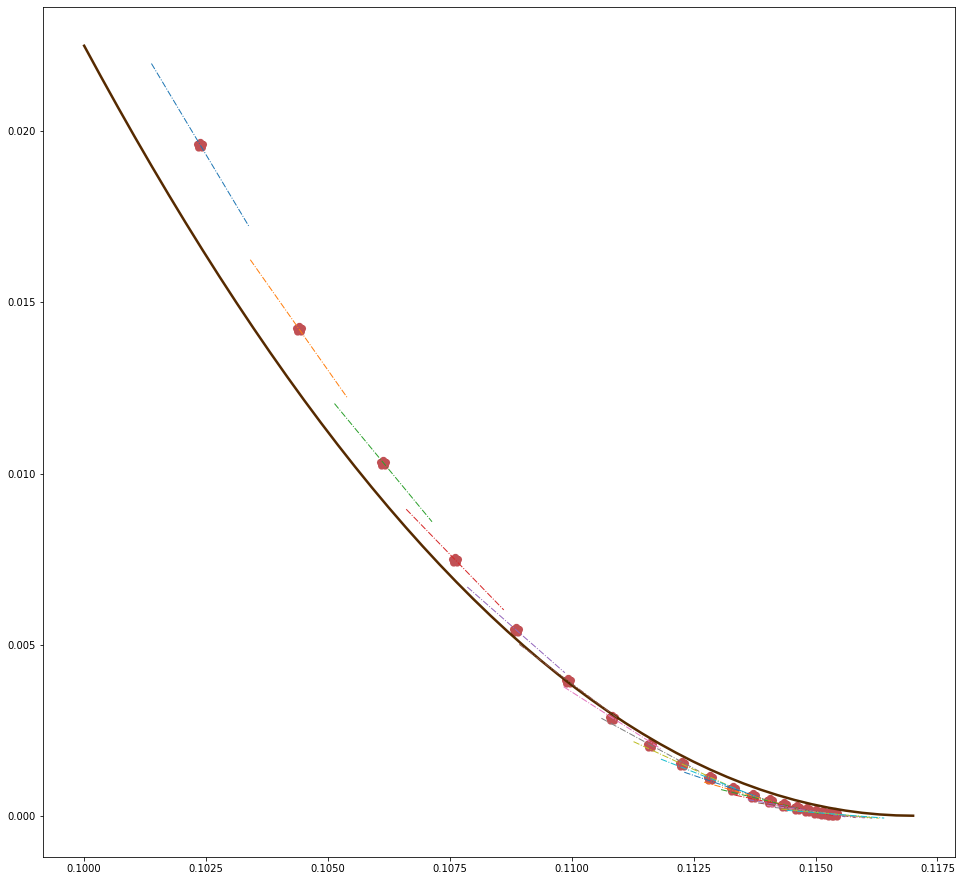

In [45]:
fig = plt.figure(figsize=(26, 24), constrained_layout=True)

error_range = np.linspace(0.15, 0)
parabola = error_range**2

ax1 = fig.add_subplot(221)
ax1.plot(np.linspace(0.1, 0.117), parabola, color = '#562a00', linewidth = 2.5)
ax1.scatter(array_weights_first_case, array_errors, color = '#c15054', marker='*', linewidth = 7.5)
for i in range(len(array_derivative_first_case)):
  w = array_weights_first_case[i]
  x_tan = np.linspace(w-0.001, w+0.001, 10)
  y_tan = array_derivative_first_case[i]*(x_tan-w) + array_errors[i]
  ax1.plot(x_tan, y_tan, linewidth = 1, linestyle='dashdot')


# Задание 3. Построение графиков

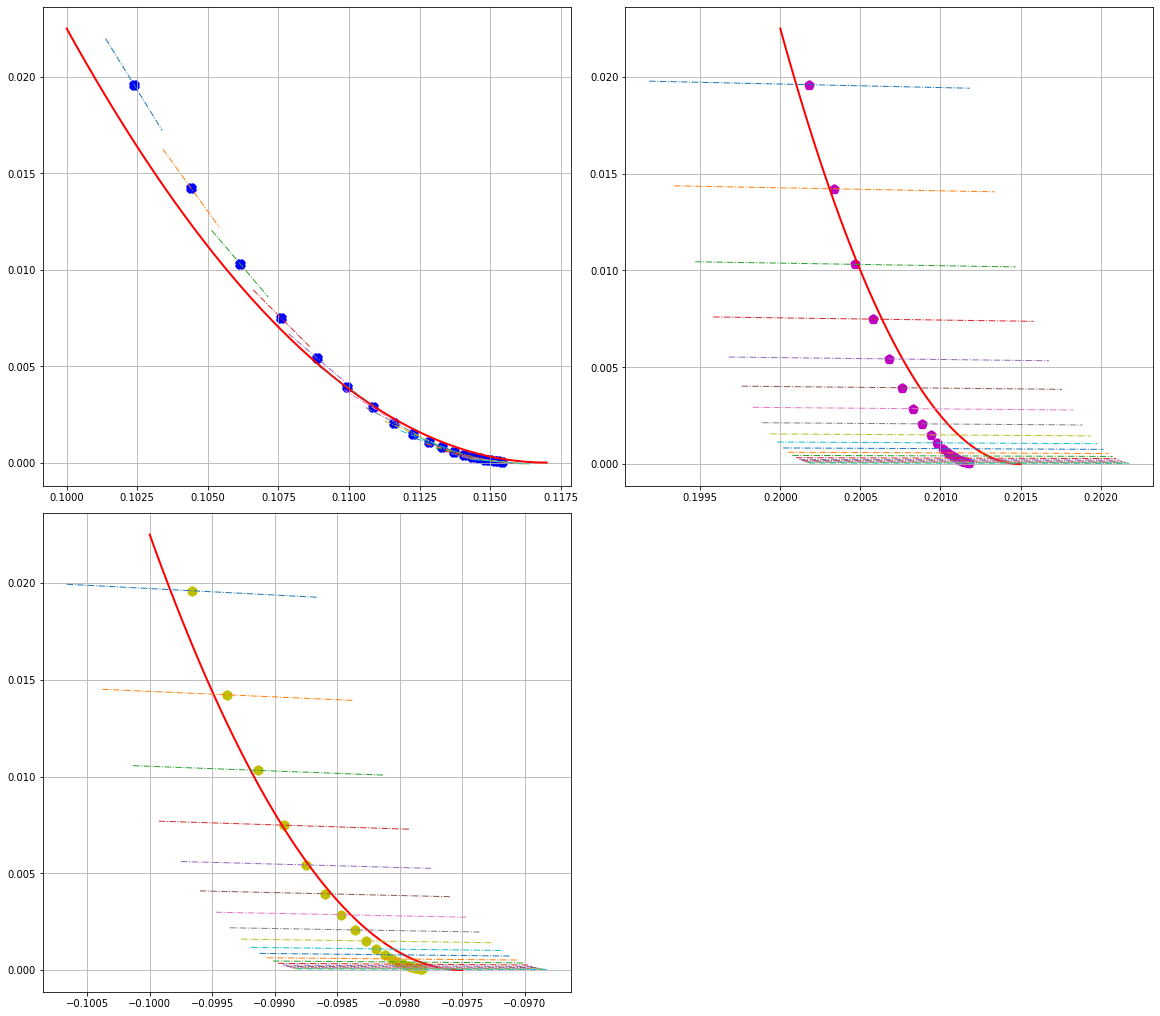

In [46]:
fig = plt.figure(figsize=(16, 14), constrained_layout=True)

error_range = np.linspace(0.15, 0)

ax1 = fig.add_subplot(221)
ax1.plot(np.linspace(0.1, 0.117), parabola, color = 'red', linewidth = 2)
ax1.scatter(array_weights_first_case, array_errors, color = 'b', linewidth = 4.5, marker='X')
for i in range(len(array_derivative_first_case)):
  w = array_weights_first_case[i]
  x_tan = np.linspace(w-0.001, w+0.001, 10)
  y_tan = array_derivative_first_case[i]*(x_tan-w) + array_errors[i]
  ax1.plot(x_tan, y_tan, linewidth = 1, linestyle='dashdot')
plt.grid()

ax2 = fig.add_subplot(222)
ax2.plot(np.linspace(0.2, 0.2015), error_range**2, color = 'red', linewidth = 2)
ax2.scatter(array_weights_second_case, array_errors, color = 'm', linewidth = 4.5, marker='p')
for i in range(len(array_derivative_second_case)):
  w = array_weights_second_case[i]
  x_tan = np.linspace(w-0.001, w+0.001, 10)
  y_tan = array_derivative_second_case[i]*(x_tan-w) + array_errors[i]
  ax2.plot(x_tan, y_tan, linewidth = 1, linestyle='dashdot')
plt.grid()

ax3 = fig.add_subplot(223)
ax3.plot(np.linspace(-0.1, -0.0975), error_range**2, color = 'red', linewidth = 2)
ax3.scatter(array_weights_third_case, array_errors, color = 'y', linewidth = 4.5, marker='h')
for i in range(len(array_derivative_third_case)):
  w = array_weights_third_case[i]
  x_tan = np.linspace(w-0.001, w+0.001, 10)
  y_tan = array_derivative_third_case[i]*(x_tan-w) + array_errors[i]
  ax3.plot(x_tan, y_tan, linewidth = 1, linestyle='dashdot')
plt.grid()


## Ответы на вопросы

### Для какого веса наклон касательной больше?<br/>К чему приводит большой наклон касательной при коррекции веса?  
Ответ:<br/>Для первого веса наклон больше.<br/>Чем больше наклон касательной, тем больше будет значение изменения веса.
